In [3]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# % matplotlib inline

In [4]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [5]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [6]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
import re
import emoji


In [10]:
import re
import pandas as pd

# Function to detect lines that start with a WhatsApp date and time
def startsWithDateAndTime(s):
    pattern = r'^\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2} (AM|PM) - '
    return re.match(pattern, s) is not None

# Function to extract date, time, author, and message from a line
def getDataPoint(line):
    splitLine = line.split(" - ")
    datetimePart = splitLine[0]
    messagePart = " - ".join(splitLine[1:])  # in case message contains " - "

    date, time = datetimePart.split(", ")
    if ": " in messagePart:
        author, message = messagePart.split(": ", 1)
    else:
        author = None
        message = messagePart
    return date, time, author, message

# Parse the WhatsApp chat file
data = []
conversation = 'whatsapp_chat_with_system_and_media.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()  # Skip first line (encryption message)
    messageBuffer = []
    date, time, author = None, None, None

    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDateAndTime(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDataPoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

    # Append the last message
    if len(messageBuffer) > 0:
        data.append([date, time, author, ' '.join(messageBuffer)])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Time", "Author", "Message"])

# Optional: Display the first few rows
print(df.head())


      Date     Time Author                           Message
0  3/20/25  9:03 AM  Alice        Don't forget the charger 😂
1  3/20/25  9:02 AM    Bob     Did you see the news today? 👽
2  3/20/25  9:09 AM  Alice      What time are we meeting? 🧃🧃
3  3/20/25  9:12 AM    Bob  Good luck with the interview! 🙌🙌
4  3/20/25  9:20 AM    Bob      You'll get hooked by ep 2 😊💯


In [12]:
# df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
# df["Date"] = pd.to_datetime(df["Date"])
# df.tail(20)

In [13]:
df.Author.unique()

array(['Alice', 'Bob', None, 'Charlie'], dtype=object)

In [15]:
import pandas as pd
import regex  # better emoji support
import emoji
import re
import numpy as np

# Assuming df is already defined and contains the parsed WhatsApp messages

# Count total messages
total_messages = df.shape[0]

# Count media messages
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print("Media messages:", media_messages)

# Function to extract emojis from a message
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

# Add a column with emojis
df["emoji"] = df["Message"].apply(split_count)

# Total number of emojis
emojis = sum(df['emoji'].str.len())
print("Emojis:", emojis)

# Count links in messages
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df["Message"].apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df['urlcount'])
print("Links:", links)

# Print overall stats
print("Data Science Community")
print("Messages:", total_messages)
print("Media:", media_messages)
print("Emojis:", emojis)
print("Links:", links)


Media messages: 81
Emojis: 1440
Links: 0
Data Science Community
Messages: 999
Media: 81
Emojis: 1440
Links: 0


In [17]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ['Alice', 'Bob', None, 'Charlie']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 998
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      918 non-null    object
 1   Time      918 non-null    object
 2   Author    892 non-null    object
 3   Message   918 non-null    object
 4   emoji     918 non-null    object
 5   urlcount  918 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 50.2+ KB
Stats of Alice -
Messages Sent 314
Words per message 5.547770700636943
Media Messages Sent 36
Emojis Sent 528
Links Sent 0

Stats of Bob -
Messages Sent 276
Words per message 5.655797101449275
Media Messages Sent 20
Emojis Sent 437
Links Sent 0

Stats of None -
Messages Sent 0
Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of Charlie -
Messages Sent 302
Words per message 5.599337748344371
Media Messages Sent 25
Emojis Sent 475
Links Sent 0



C:\Users\jaikr\AppData\Local\Temp\ipykernel_20468\3133942563.py:17: RuntimeWarning: invalid value encountered in scalar divide
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]


In [18]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

('😎', 147)
('🔥', 139)
('👽', 130)
('🥞', 120)
('🚀', 119)
('😊', 113)
('🍳', 111)
('🧃', 106)
('😂', 101)
('🙌', 99)
('💯', 91)
('🎮', 34)
('❤️', 28)
('🎬', 28)
('😅', 27)
('☀️', 24)
('😒', 23)


There are 26275 words in all the messages.


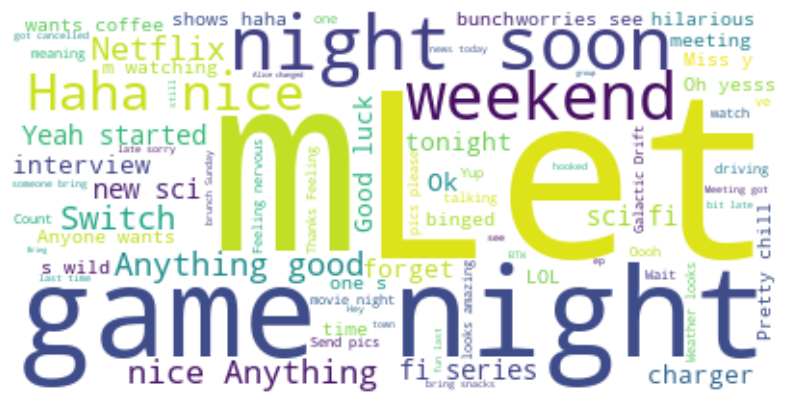

In [19]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Alice


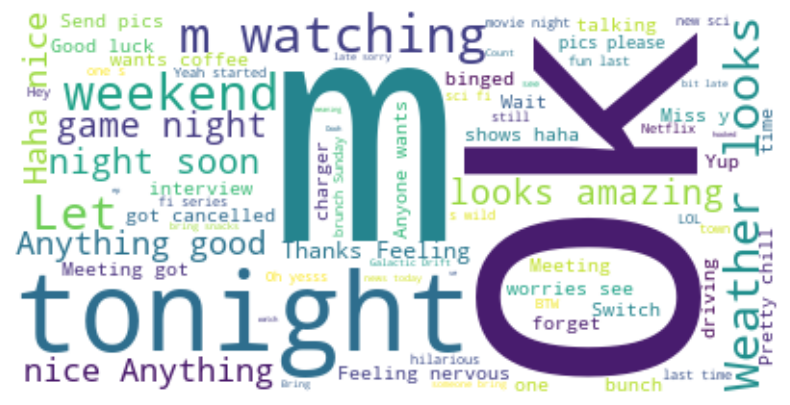

Author name Bob


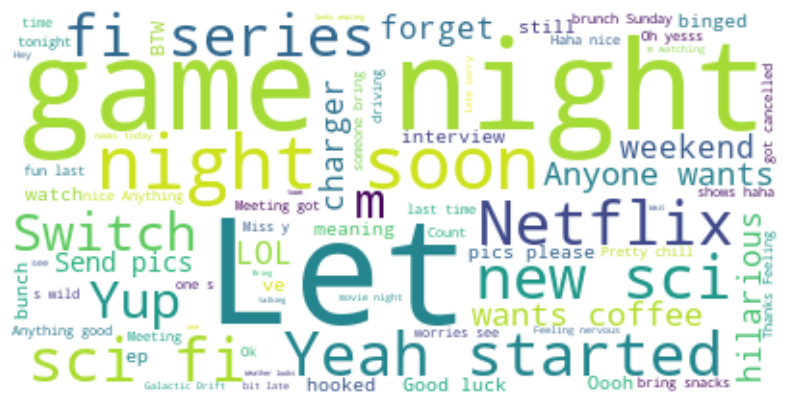

Author name Charlie


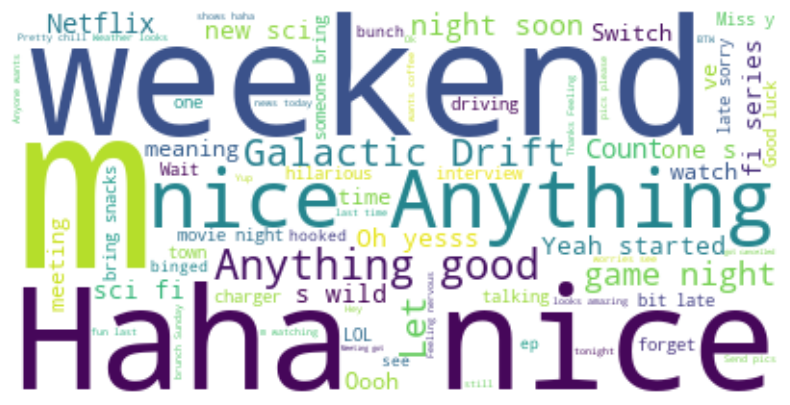

In [21]:
l = ['Alice', 'Bob', 'Charlie']
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()